In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/apr_16-20.csv')
dft.head()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-16,1250614193536905217,https://t.co/ZaqCuL1AAC. @_sabanaqvi .Stop quo...,[],128.0,{'country_code': 'in'},sabanaqvi stop quoting educated muslims instea...,-1
1,2020-04-16,1250614589332439040,Coronavirus | Russian state-owned arms firm to...,[],63.0,{'country_code': 'in'},coronavirus russian state owned arms firm dona...,1
2,2020-04-16,1250614593015046144,I am hearing from many places that doctors are...,[],165.0,{'country_code': 'in'},hearing many places doctors either hesitating ...,-1
3,2020-04-16,1250614641715077120,Dovale is a #pharmacist with great footballero...,"['pharmacist', 'pharmacists', 'pharmacists', '...",13.0,{'country_code': 'in'},dovale pharmacist great footballerof span work...,1
4,2020-04-16,1250614806643486720,Ask Corona if it wishes to stay with you or no...,[],1355.0,"{'country_code': 'in', 'state': 'Karnataka', ...",ask corona wishes stay ?,1


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(431988, 8)


,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-04-16,1250614193536905217,https://t.co/ZaqCuL1AAC. @_sabanaqvi .Stop quo...,[],128.0,{'country_code': 'in'},sabanaqvi stop quoting educated muslims instea...,-1
1,2020-04-16,1250614589332439040,Coronavirus | Russian state-owned arms firm to...,[],63.0,{'country_code': 'in'},coronavirus russian state owned arms firm dona...,1
2,2020-04-16,1250614593015046144,I am hearing from many places that doctors are...,[],165.0,{'country_code': 'in'},hearing many places doctors either hesitating ...,-1
3,2020-04-16,1250614641715077120,Dovale is a #pharmacist with great footballero...,"['pharmacist', 'pharmacists', 'pharmacists', '...",13.0,{'country_code': 'in'},dovale pharmacist great footballerof span work...,1
4,2020-04-16,1250614806643486720,Ask Corona if it wishes to stay with you or no...,[],1355.0,"{'country_code': 'in', 'state': 'Karnataka', ...",ask corona wishes stay ?,1


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
431983,2020-04-18,1251571339074256899,👉Starting my #2k20 with #FirstTweet during th...,"['2k20', 'FirstTweet', 'lockdown', 'Twitter', ...",0.0,"{'country_code': 'in', 'state': 'Uttar Pradesh'}",starting firsttweet lockdown twitter newprofil...,0
431984,2020-04-18,1251333387282857985,"Global Coronavirus death count reaches 1,50,00...",['mathrubhumi'],0.0,"{'country_code': 'in', 'state': 'Kerala'}",global coronavirus death count reaches report ...,-1
431985,2020-04-18,1251489040504721408,@anandmahindra Definitely not in social behavi...,[],0.0,{'country_code': 'in'},definitely social behaviour splitting public s...,-1
431986,2020-04-18,1251419309663858689,@BhaavnaArora Kiss with or without the mask wo...,[],0.0,{'country_code': 'in'},kiss without mask would everlasting feel like,1
431987,2020-04-18,1251487348879052801,* COVID-19 updates as on 18.04.2020 at 5 PM * ...,[],0.0,{'country_code': 'in'},covid updates pm active cases cured discharged...,1


In [ ]:
print(df.shape)
df.isnull().sum()

(431988, 8)


date             0
id               0
text             0
hashtags         6
retweet_count    6
location         6
cleaned          0
sentiment        0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    sabanaqvi stop quoting educated muslims instea...
1    coronavirus russian state owned arms firm dona...
2    hearing many places doctors either hesitating ...
3    dovale pharmacist great footballerof span work...
4                              ask corona wishes stay 
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

431988


'sabanaqvi stop quoting educated muslims instead release video educating community illiterate indoctrinated religion coronavirus let know endanger whole humanity stupidity arrogance'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

Warming up PyWSD (takes ~10 secs)... took 5.698617458343506 secs.


In [ ]:
t_clean[0]

['sabanaqvi',
 'stop',
 'quoting',
 'educate',
 'muslim',
 'instead',
 'release',
 'video',
 'educate',
 'community',
 'illiterate',
 'indoctrinate',
 'religion',
 'coronavirus',
 'let',
 'know',
 'endanger',
 'whole',
 'humanity',
 'stupidity',
 'arrogance']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

sabanaqvi


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

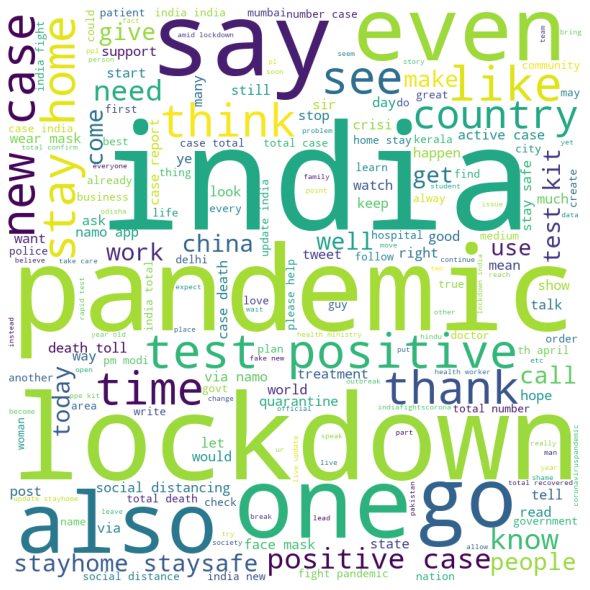

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['sabanaqvi stop quoting educate muslim instead release video educate community illiterate indoctrinate religion coronavirus let know endanger whole humanity stupidity arrogance',
 'coronavirus russian state own arm firm donate million pm care fund big departure govts policy accept fund foreign sovereign entity',
 'hear many place doctor either hesitate outright refuse go minority dominate area coronavirus scare',
 'dovale pharmacist great footballerof span work family pharmacy pandemic salute sir effort appreciate great tous pharmacist thanks pharmacist pharmacistwarrior pharmacist unsung warrior',
 'ask corona wish stay']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['aarogya setu',
 'aarogya setu app',
 'across country',
 'across globe',
 'across india',
 'across state',
 'across world',
 'action take',
 'active case',
 'active case cure',
 'active case total',
 'affect individual',
 'amid crisis',
 'amid lockdown',
 'amid outbreak',
 'amid pandemic',
 'amidst lockdown',
 'amidst pandemic',
 'amit shah',
 'andhra pradesh',
 'anil kohli',
 'answer question',
 'anti national',
 'antibody test',
 'antonio guterres',
 'antonio guterres salute',
 'april pm',
 'april th',
 'around world',
 'arundhati roy',
 'arvind kejriwal',
 'asharamji bapu',
 'ask question',
 'attack doctor',
 'back home',
 'bank account',
 'bbc news',
 'best cm',
 'best way',
 'boy test',
 'boy test positive',
 'break chain',
 'break news',
 'break news celebrity',
 'breakingnews latestnews',
 'breakingnews latestnews indianmarkets',
 'bring back',
 'cancel due',
 'care fund',
 'care worker',
 'case active',
 'case active case',
 'case confirm',
 'case country',
 'case cross',
 'ca

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:save life,sir please,due pandemic,help people,antibody test,time pandemic,tough time,red zone,well do,would like\nTopic 1:lockdown india,live update,time india,may take,look like,jai hind,good news,take long,take long usual,long usual\nTopic 2:fight pandemic,health ministry,matterhorn mountain,health worker,express solidarity,last hour,switzerland express,switzerland express solidarity,day lockdown,indian flag\nTopic 3:stay home,social distancing,stay safe,wear mask,th april,social distance,home stay,stay home stay,home stay safe,amid lockdown\nTopic 4:new case,case report,total case,case india,case death,active case,confirm case,due lockdown,west bengal,make mask\nTopic 5:test positive,fake news,tablighi jamaat,pandemic situation,case rise,please take,lockdown period,family member,help fight,relief fund\nTopic 6:positive case,test kit,death toll,number case,rapid test,total number,ppe kit,take action,rapid test kit,chief minister\nTopic 7:namo app,via namo,via namo app,update

In [ ]:
lda.perplexity(tf)

553.186256898242

In [ ]:
f=open('lda_apr_16-20.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_apr_16-20.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_apr_16-20.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_apr_16-20.pk')
shutil.move("topics_apr_16-20.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_apr_16-20.txt')